In [1]:
#For reading, inspecting and preparing the dataset
import pandas as pd

In [3]:
#For mathematical operations
import numpy as np

In [5]:
#For showing customizing visualizations like tables, grids and labels 
import matplotlib.pyplot as plt

In [7]:
#For visualizing scatterplot
import seaborn as sns

In [9]:
#For applying K-Means Algorithm
from sklearn.cluster import KMeans

In [11]:
#Step 1: Loading the Dataset
df = pd.read_csv("C:/Users/HC/Mall_Customers.csv")  #Path to the .csv file
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
#Step 2: Understanding the dataset(Initial Exploration)
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (200, 5)

Data types:
 CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
 #EDA - Exploratory Data Analysis:

Number of unique Customer IDs: 200
Total rows in dataset: 200
Missing values in CustomerID: 0


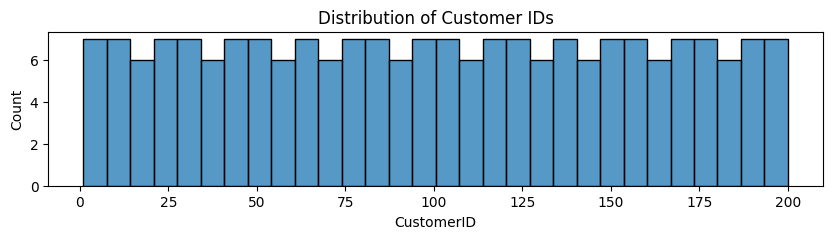

In [17]:
#Customer ID:
# Checking uniqueness of CustomerID
print("Number of unique Customer IDs:", df['CustomerID'].nunique())
print("Total rows in dataset:", df.shape[0])
# Checking for missing values in CustomerID
print("Missing values in CustomerID:", df['CustomerID'].isnull().sum())
plt.figure(figsize=(10, 2)) #Visualizing using mtplotlib
sns.histplot(df['CustomerID'], bins=30, kde=False)
plt.title("Distribution of Customer IDs")
plt.show()

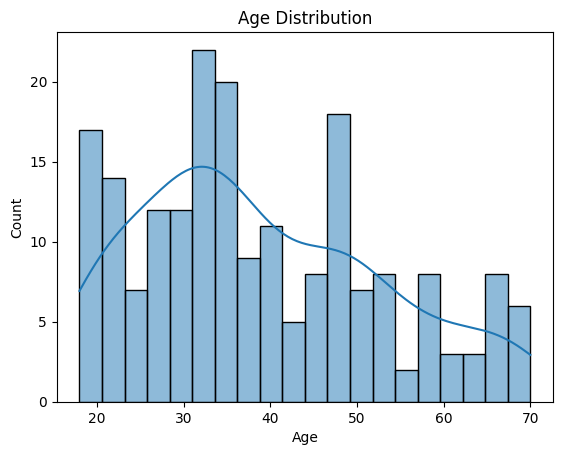

In [19]:
# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

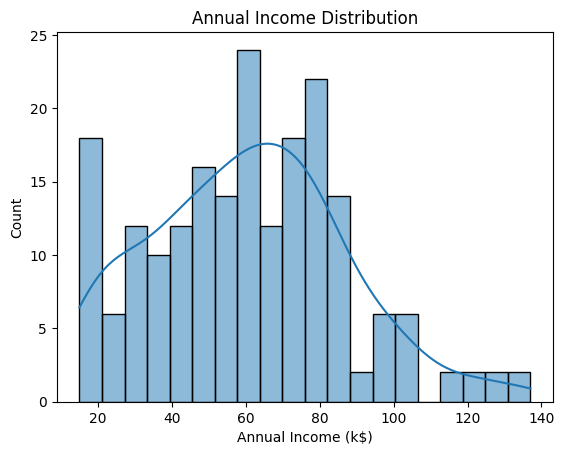

In [21]:
# Income Distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

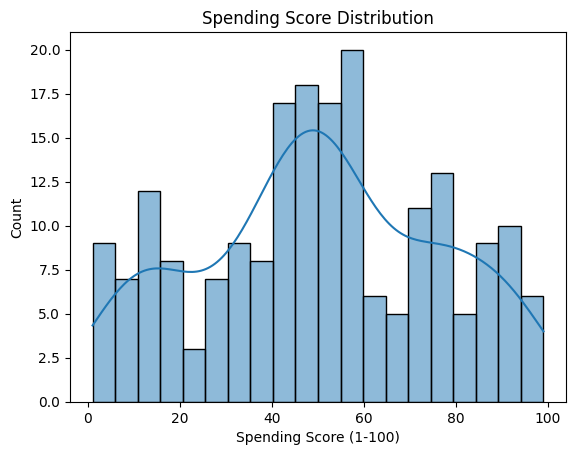

In [23]:
# Spending Score Distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

In [25]:
# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [27]:
# Elbow method to find Optimal clusters(k)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

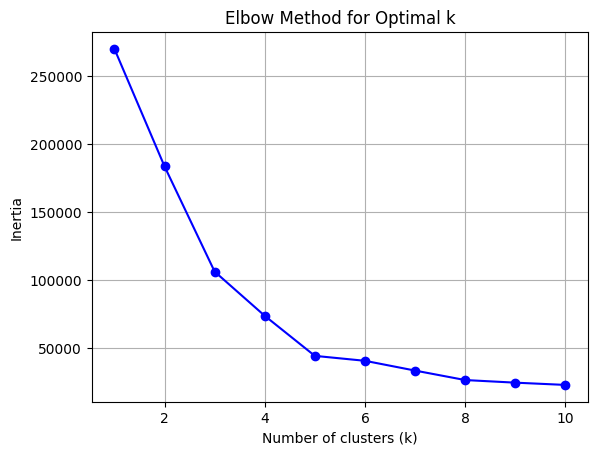

In [29]:
# Plotting Elbow Graph
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [31]:
#Applying K-Means with Optimal k:
# Based on Elbow plot, I assumed k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

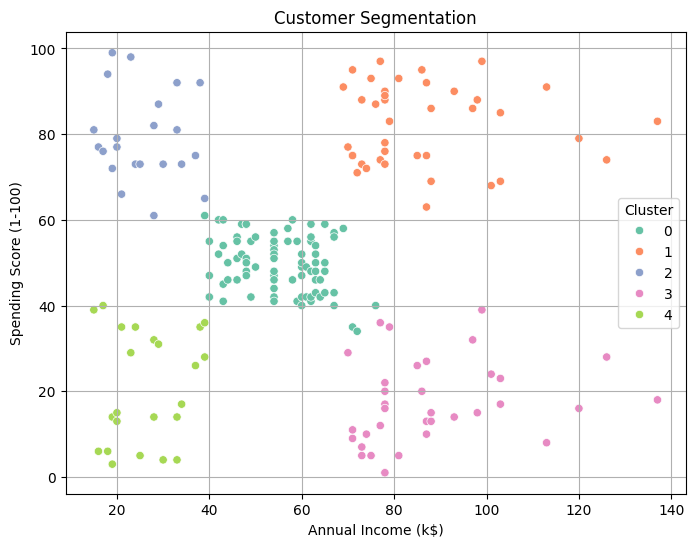

In [33]:
#Visualizing the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [35]:
#Analyzing Cluster Centroids
centroids = kmeans.cluster_centers_
print("Centroids of Clusters:\n", centroids)

Centroids of Clusters:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


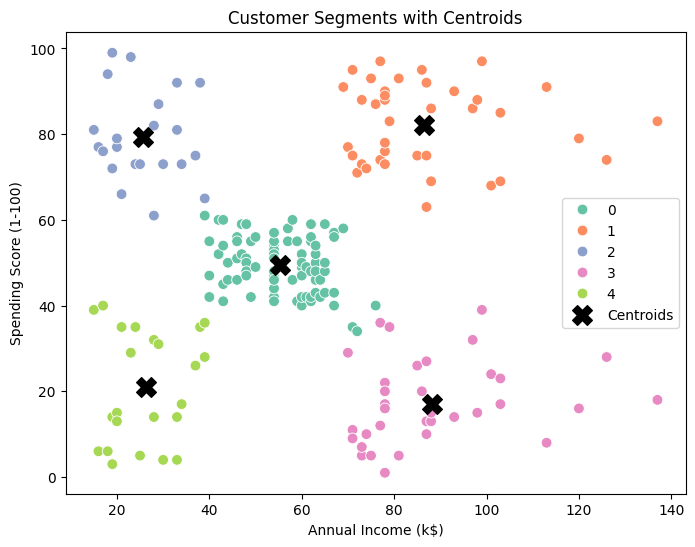

In [37]:
# Plot with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.legend()
plt.show()